In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import json 
import os



mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.autolayout'] = False
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['lines.markersize'] = 5
mpl.rcParams['lines.markeredgewidth'] = 1.2
mpl.rcParams['errorbar.capsize'] = 5
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['xtick.minor.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 6
mpl.rcParams['ytick.minor.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 6
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams['font.family'] = 'sans-serif'
# mpl.rcParams["text.usetex"] = True



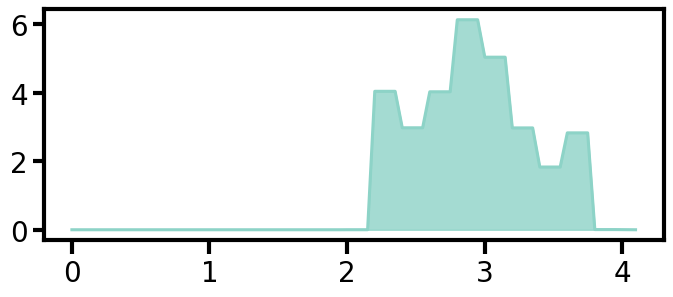

In [21]:
with open("./Data/opt_schedule.json", "r") as file:
    schedule = json.load(file)

omegas = [0,0] + [i for i in schedule["omega_list"] for _ in range(2)] + [0]
deltas = [0,0] + [i for i in schedule["delta_list"] for _ in range(2)] + [0]
phis = len(omegas) * [0]
num_pulses = len(schedule["omega_list"])

t_tot = 2.0e-6
t_q = 0.052e-6
t_p = t_tot/num_pulses-t_q
t_delay = round(1.95e-6,9)
times = [0 , t_delay]
t_i = t_delay
for i in range(0, num_pulses):
    t_i += round(t_q,9)
    times.append(t_i)
    t_i += round(t_p,9)
    times.append(t_i)
times.append(round(t_i+t_p,9))

fig, ax = plt.subplots(figsize=(8,3))
colors = plt.get_cmap("Set3")
ax.plot(1e6*np.array(times), 1e-6*np.array(omegas), color= colors(0))
ax.fill_between(1e6*np.array(times), phis, 1e-6*np.array(omegas), color= colors(0), alpha=0.8)
fig.savefig("./Figures/omegas.pdf", bbox_inches="tight", transparent=True)

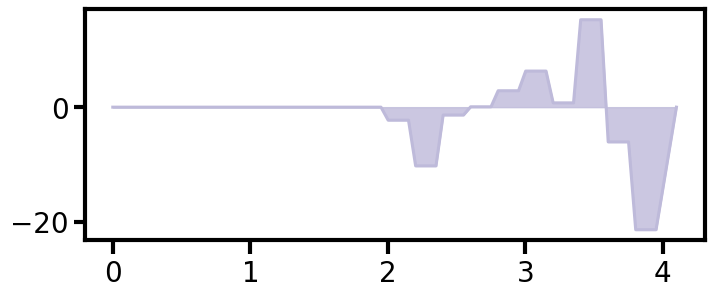

In [20]:
fig, ax = plt.subplots(figsize=(8,3))
colors = plt.get_cmap("Set3")
ax.plot(1e6*np.array(times), 1e-6*np.array(deltas), color= colors(2))
ax.fill_between(1e6*np.array(times), phis, 1e-6*np.array(deltas), color= colors(2), alpha=0.8)
fig.savefig("./Figures/deltas.pdf", bbox_inches="tight", transparent=True)

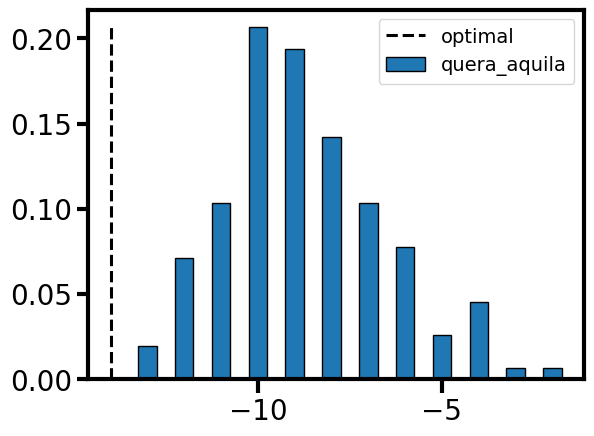

In [53]:
nq = 34
backend_name = "braket_emulator"
backend_name = "quera_aquila"

with open(f"./Data/{backend_name}/{nq}.json", "r") as file:
    result = json.load(file)

fig, ax = plt.subplots()
keys = [int(i) for i in result["cost"].keys()]
res_i = [result["cost"][str(i)]/sum(result["cost"].values()) for i in keys]
ax.bar(keys, res_i, label=backend_name, edgecolor="black",width=0.5)
ax.vlines(result["min_cost"], 0, max(res_i), color="black", linestyle="--", label="optimal")
ax.legend()
os.makedirs(f"./Figures/{backend_name}/", exist_ok=True)
fig.savefig(f"./Figures/{backend_name}/{nq}.pdf", bbox_inches="tight", transparent=True)

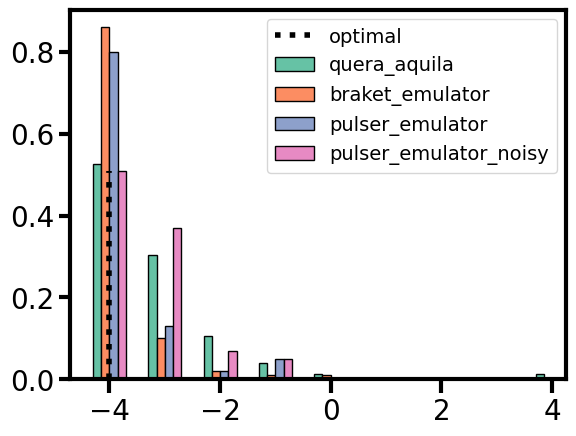

In [63]:
nq = 13
backends = ["quera_aquila","braket_emulator", "pulser_emulator", "pulser_emulator_noisy"]
colors= plt.get_cmap("Set2")
results = {}
for backend_name in backends:
    with open(f"./Data/{backend_name}/{nq}.json", "r") as file:
        results[backend_name] = json.load(file)
width = 0.15
fig, ax = plt.subplots()
for nn, backend_name in enumerate(backends):
    keys = np.array([int(i) for i in results[backend_name]["cost"].keys()])
    res_i = [results[backend_name]["cost"][str(i)]/sum(results[backend_name]["cost"].values())  for i in keys]
    ax.bar(keys+width*nn-width*(len(backends)-1)/2, res_i, label=backend_name, edgecolor="black",width=width, color=colors(nn))
ax.vlines(results[backend_name]["min_cost"], 0, max(res_i), color="black", linestyle=":", label="optimal", linewidth=4)
ax.legend()
os.makedirs(f"./Figures/{backend_name}/", exist_ok=True)
fig.savefig(f"./Figures/{nq}_comparison.pdf", bbox_inches="tight", transparent=True)

/Users/alejomonbar/Documents/GitHub/Benchmarking-neutral-atom-QPUs/.conda/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


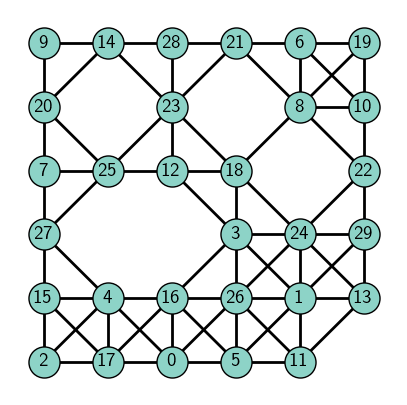

In [5]:
nq = 30
colors= plt.get_cmap("Set3")
backend_name = "braket_emulator"
with open(f"./Data/problems/{nq}.json", "r") as file:
    problem = json.load(file)
fig, ax = plt.subplots(figsize=(5,5))
G = nx.Graph()
G.add_edges_from(problem["edges"])
nx.draw(G, pos=problem["pos"], with_labels=True, node_size=500, node_color=colors(0), font_size=14, edgecolors="black", ax=ax, width=2)
fig.savefig(f"./Figures/Graphs/{nq}.pdf", bbox_inches="tight", transparent=True)